In [1]:
import pandas as pd
import seaborn as sns
import visuals as vs
import numpy as np



In [2]:
df = pd.read_csv('test.csv')

In [3]:
df.head(n=10)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ..."
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...


### Below i'm adding features to the dataset that are computed from the comment text. Some i've seen in discussions for this competition, others i came up with while looking at the data. Right now, they are:

- Length of the comment - my initial assumption is that angry people write short messages
- Number of capitals - observation was many toxic comments being ALL CAPS
- Proportion of capitals - see previous
- Number of exclamation marks - i observed several toxic comments with multiple exclamation marks
- Number of question marks - assumption that angry people might not use question marks
- Number of punctuation symbols - assumption that angry people might not use punctuation
- Number of symbols - assumtion that words like fck or # or sh*t mean more symbols in foul language (Thx for tip!)
- Number of words - angry people might write short messages?
- Number of unique words - observation that angry comments are sometimes repeated many times
- Proportion of unique words - see previous
- Number of (happy) smilies - Angry people wouldn't use happy smilies, right?

In [4]:
df['total_length'] = df['comment_text'].apply(len)
df['capitals'] = df['comment_text'].apply(lambda comment: sum(1 for c in comment if c.isupper()))
df['caps_vs_length'] = df.apply(lambda row: float(row['capitals'])/float(row['total_length']),
                                axis=1)
df['num_exclamation_marks'] = df['comment_text'].apply(lambda comment: comment.count('!'))
df['num_question_marks'] = df['comment_text'].apply(lambda comment: comment.count('?'))
df['num_punctuation'] = df['comment_text'].apply(
    lambda comment: sum(comment.count(w) for w in '.,;:'))
df['num_symbols'] = df['comment_text'].apply(
    lambda comment: sum(comment.count(w) for w in '*&$%'))
df['num_words'] = df['comment_text'].apply(lambda comment: len(comment.split()))
df['num_unique_words'] = df['comment_text'].apply(
    lambda comment: len(set(w for w in comment.split())))
df['words_vs_unique'] = df['num_unique_words'] / df['num_words']
df['num_smilies'] = df['comment_text'].apply(
    lambda comment: sum(comment.count(w) for w in (':-)', ':)', ';-)', ';)')))

In [5]:
df.head()

,id,comment_text,total_length,capitals,caps_vs_length,num_exclamation_marks,num_question_marks,num_punctuation,num_symbols,num_words,num_unique_words,words_vs_unique,num_smilies
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,367,4,0.010899,0,0,11,0,72,61,0.847222,0
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,50,7,0.140000,0,0,2,0,12,11,0.916667,0
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",56,4,0.071429,0,0,0,1,12,10,0.833333,0
3,00017563c3f7919a,":If you have a look back at the source, the in...",205,4,0.019512,0,0,5,0,38,30,0.789474,0
4,00017695ad8997eb,I don't anonymously edit articles at all.,41,1,0.024390,0,0,1,0,7,7,1.000000,0


In [21]:
df = pd.read_csv('stage_one_ensemble_features/test/test_extra_feature.csv')

In [15]:
xtra = df[['id','capitals','num_unique_words', 'num_exclamation_marks', 'num_punctuation']]

In [16]:
xtra.head()

,id,capitals,num_unique_words,num_exclamation_marks,num_punctuation
0,0000997932d777bf,2.890372,3.737670,0,6
1,000103f0d9cfb60f,2.197225,2.890372,1,5
2,000113f07ec002fd,1.609438,3.688879,0,4
3,0001b41b1c6bb37e,2.484907,4.418841,0,6
4,0001d958c54c6e35,1.098612,2.639057,0,3


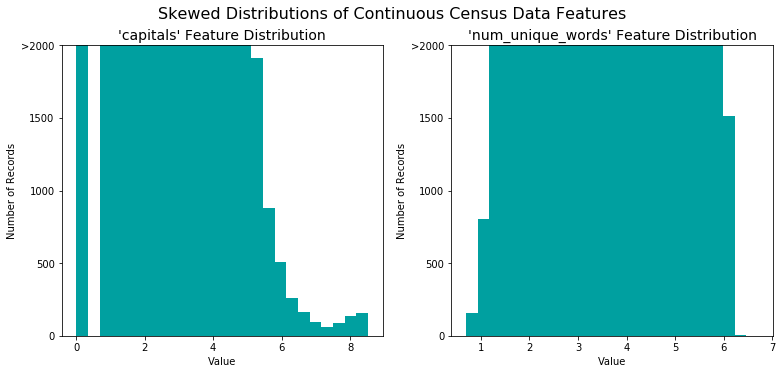

In [17]:
#xtra = pd.read_csv('extra_feature.csv')
vs.distribution(xtra)


In [18]:
skewed = ['num_punctuation']
xtra[skewed] = xtra[skewed].apply(lambda x: np.log(x + 1))


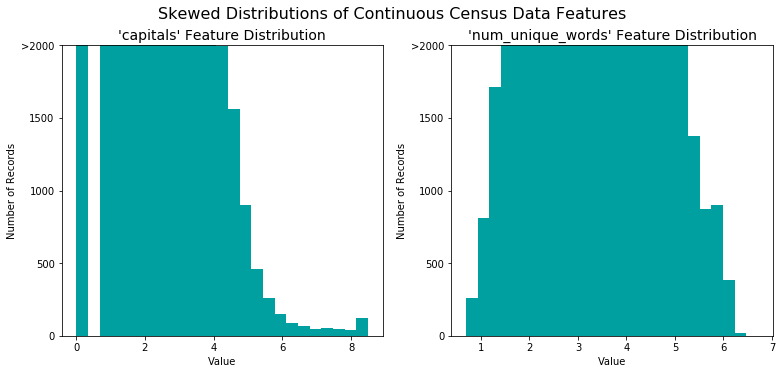

In [10]:
vs.distribution(xtra)


In [11]:
xtra.shape

(153164, 5)

In [19]:
xtra.head()

,id,capitals,num_unique_words,num_exclamation_marks,num_punctuation
0,0000997932d777bf,2.890372,3.737670,0,1.945910
1,000103f0d9cfb60f,2.197225,2.890372,1,1.791759
2,000113f07ec002fd,1.609438,3.688879,0,1.609438
3,0001b41b1c6bb37e,2.484907,4.418841,0,1.945910
4,0001d958c54c6e35,1.098612,2.639057,0,1.386294


In [20]:
xtra.to_csv('stage_one_ensemble_features/extra_feature.csv', index=False)


In [5]:
features = ('total_length', 'capitals', 'caps_vs_length', 'num_exclamation_marks',
            'num_question_marks', 'num_punctuation', 'num_words', 'num_unique_words',
            'words_vs_unique', 'num_smilies', 'num_symbols')
columns = ('toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate')

rows = [{c:df[f].corr(df[c]) for c in columns} for f in features]
df_correlations = pd.DataFrame(rows, index=features)

In [6]:
df_correlations

,identity_hate,insult,obscene,severe_toxic,threat,toxic
total_length,-0.013585,-0.045335,-0.043472,0.009638,-0.008291,-0.054861
capitals,0.054481,0.074951,0.079174,0.141708,0.032839,0.086789
caps_vs_length,0.096589,0.172561,0.184061,0.169038,0.054317,0.220908
num_exclamation_marks,0.005908,0.026628,0.024009,0.060316,0.034405,0.037074
num_question_marks,-0.000027,0.006355,0.006442,-0.003995,-0.004006,0.028786
num_punctuation,-0.020774,-0.047778,-0.042646,-0.009712,-0.002851,-0.054982
num_words,-0.014194,-0.043262,-0.041664,0.009549,-0.007251,-0.052349
num_unique_words,-0.032474,-0.081043,-0.081098,-0.047476,-0.020348,-0.096528
words_vs_unique,0.014453,0.052096,0.050839,-0.018958,-0.000532,0.064896
num_smilies,0.000986,-0.004495,-0.003716,-0.002793,-0.001457,-0.004455


In [7]:
import seaborn as sns

ax = sns.heatmap(df_correlations, vmin=-0.2, vmax=0.2, center=0.0)

In [8]:
print ax

Axes(0.125,0.125;0.62x0.755)
